In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog

<font  style="font-size: 4rem; color: #1abc9c"> Random Forests </font>

In Scikit-learn, the Random Forests methods are implemented via the <code>RandomForestClassifier</code> and <code>RandomForestCRegressor</code> class. Main parameters are:

    n_estimators: the number of trees in the forest.

    max_features : the number of attributes randomly drawn.

    oob_score : boolean. Estimate or not the generalization error OOB (Out of Bag).

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# <font color="#1E90FF">Handwritten digits</font>
Similarly to Decision Trees notebook, we will first apply random forest to the raw images, and then try to improve the performance using HOG representations of images.

In [48]:
mnist = pd.read_csv('./data/cp_sample.csv', sep=';')

In [49]:
# Number of Samples
print("Number of samples : ", len(mnist))

Number of samples :  1000


In [50]:
print("Differents class : ", set(list(mnist["label"])))

# Class distribution in train
print("Train set : \n", mnist["label"].value_counts())


Differents class :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Train set : 
 2    121
1    113
4    104
3    100
8    100
0     97
7     94
6     91
5     91
9     89
Name: label, dtype: int64


In [51]:
# Dataset split into train/test set
data_train, data_test = train_test_split(mnist, test_size = 0.3, random_state = 4)


X = data_train.iloc[:, 1:]
y = data_train.iloc[:, 0]

X_test = data_test.iloc[:, 1:]
y_test = data_test.iloc[:, 0]
#Class distribution in train
print("Train set : ", data_train["label"].value_counts())

Train set :  2    82
1    78
0    74
3    72
8    71
4    70
7    66
6    65
5    63
9    59
Name: label, dtype: int64


## <font color="#9400D3">1. Basic RF</font>

<font color="blue">**Todo:**</font> learn a RandomForest with 10 trees, enabling the use of out-of-bag samples to estimate the generalization score.

In [52]:
randomForest10 = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0, oob_score=True)

randomForest10.fit(X, y)

# Estimage the generalization score
oob_score = randomForest10.oob_score_
print("Estimation of OOB score:", oob_score)

Estimation of OOB score: 0.58


C:\Users\dounk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<font color="red">**Question 1:**</font> How many features are consider when looking for the best split?

In [53]:
# number of features in the dataset
print("Number of features:", len(X.columns))

# SSquare root of the number of features
print("Square root of the number of features:", np.sqrt(len(X.columns)))

Number of features: 784
Square root of the number of features: 28.0


> For the best split, the `max_features` is used and is equal to `sqrt(n_features)`. 
> 
> So in our case, it is equal to $sqrt(784) = 28$.

<font color="blue">**Todo:**</font> Compute the prediction score of this random forest on the training set (function <code>score()</code>) and on the OOB samples (**attribute** <code>oob_score_</code>)

In [54]:
oob_score = randomForest10.oob_score_
print("OOB error:", 1-oob_score)

# Genrealization
test_score = randomForest10.score(X_test, y_test)
print("Real error:", 1-test_score)


OOB error: 0.42000000000000004
Real error: 0.2533333333333333


<font color="red">**Question 2:**</font> 
- What represents the OOB score?
- Compare with the real (generalization) error estimated on the test set.

> Q2: 
> * The out-of-bag (OOB) score is a performance metric in random forest models that estimates how well the model will perform on new, unseen data. It is calculated by evaluating each decision tree in the forest using the observations that were not included in its training subset.
> 
> * The OOB error is 42%, which is lower than the test error (25%). This means that the model is overfitting the training data.
> The fact that the OOB error is higher than the real error indicates that the model is not generalizing well to new, unseen data.
> 
> This could be due to the model being too complex or using too many features, which can lead to overfitting.
>
> To improve the performance of the model, you could consider reducing the complexity of the model.

## <font color="#9400D3">2. Tuning the number of trees</font>

Try now different random forests (by considering different number of trees) and select the most appropriated one.

Use the OOB sample estimates which allows the RandomForestClassifier to be fit and validated whilst being trained.

Plot the OOB error as a function of the number of trees.


[10, 15, 22, 33, 50, 75, 113, 170, 256, 384, 576, 864]


C:\Users\dounk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


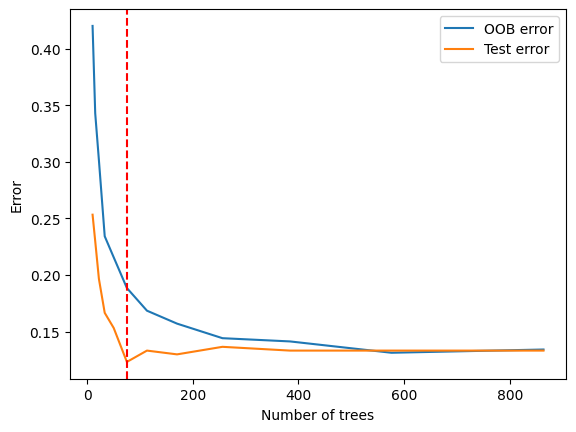

OOB error :  0.13428571428571423
Generalization error :  0.1333333333333333


In [55]:
oob_errors = []
test_errors =[]

x = 10
nn = []
while x < 1000:
    nn.append(int(x))
    x *= 1.5
print(nn)

# nn = [1,10,20,50,100,200,300]
for n in nn:
    randomForestN = RandomForestClassifier(n_estimators=n,max_depth=10, random_state=0, oob_score=True)
    randomForestN.fit(X, y)
    #print("OOB error for n_estimators = ", n, ":", 1-randomForestN.oob_score_)
    oob_errors.append(1-randomForestN.oob_score_)
    test_errors.append(1-randomForestN.score(X_test, y_test))

plt.plot(nn, oob_errors, label="OOB error")
plt.plot(nn, test_errors, label="Test error")
# vertical line
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of trees")
minimum = nn[np.argmin(test_errors)]
plt.axvline(x=minimum, color='r', linestyle='--')
plt.show()

# Best treerint("Minimum tree number : ",minimum)
print("OOB error : ",1-randomForestN.oob_score_)
print("Generalization error : ",1-randomForestN.score(X_test, y_test))


In [56]:
# selected model evaluation
best_number_tree = minimum
randomForestBest = RandomForestClassifier(n_estimators=best_number_tree,max_depth=10, random_state=0, oob_score=True)
randomForestBest.fit(X, y)
score = randomForestBest.score(X_test, y_test)


# Best tree
print("Minimum tree number : ",minimum)
print("Accuracy : ", score)
print("OOB error : ",1-randomForestBest.oob_score_)
print("Generalization error : ",1-score)

Minimum tree number :  75
Accuracy :  0.8766666666666667
OOB error :  0.1885714285714286
Generalization error :  0.1233333333333333


<font color="red">**Question 3:**</font> 
- What is the best number of trees for this dataset?
- What is the estimation of the generalization error of the selected random forest ?

>Q3: 
>
> The best number of trees is for a 75 trees random forest. We choose this number because it is the one that gives the lowest gerenalization error and an OOB error neither too small nor high.
>
> The estimation of the generalization error is 12%.

## <font color="#9400D3">3. Using HOG features</font>

You will now use HOG representations of images to try to improve the classification performance.

We compute the new training and test set with HOG representations with 8 orientations and cells of $14\times14$ pixels (you can change after).

In [57]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1), channel_axis=2)))

In [58]:
data_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
715,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,3))
hog_test = data_test.apply(my_hog, axis=1, args=(8,3))
hog_train['label'] = data_train.label
hog_test['label'] = data_test.label

hog_train

,0,1,2,3,4,5,6,7,8,9,...,639,640,641,642,643,644,645,646,647,label
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [64]:
# y is label column
X = hog_train.iloc[:, :-1]
y = hog_train.iloc[:, -1]

X_test = hog_test.iloc[:, :-1]
y_test = hog_test.iloc[:, -1]

<font color="blue">**Todo:**</font> Try different random forests (by considering different number of trees) on this new dataset and select the most appropriated one.


<font color="red">**Question 4:**</font> 
What is the estimation of the generalization error of random forest for this dataset ? Conclusion ?

[10, 15, 22, 33, 50, 75, 113, 170, 256, 384, 576, 864]


C:\Users\dounk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


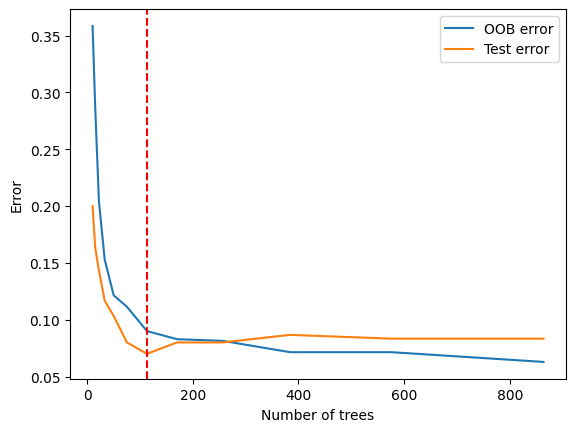

In [65]:
# select the appropriate RandomForestClassifier on the HOG features

oob_errors = []
test_errors =[]

x = 10
nn = []
while x < 1000:
    nn.append(int(x))
    x *= 1.5
print(nn)

# nn = [1,10,20,50,100,200,300]
for n in nn:
    randomForestN = RandomForestClassifier(n_estimators=n,max_depth=10, random_state=0, oob_score=True)
    randomForestN.fit(X, y)
    #print("OOB error for n_estimators = ", n, ":", 1-randomForestN.oob_score_)
    oob_errors.append(1-randomForestN.oob_score_)
    test_errors.append(1-randomForestN.score(X_test, y_test))

plt.plot(nn, oob_errors, label="OOB error")
plt.plot(nn, test_errors, label="Test error")
# vertical line
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of trees")
minimum = nn[np.argmin(test_errors)]
plt.axvline(x=minimum, color='r', linestyle='--')
plt.show()

In [66]:
# selected model evaluation
best_number_tree = minimum
randomForestBest = RandomForestClassifier(n_estimators=best_number_tree,max_depth=10, random_state=0, oob_score=True)
randomForestBest.fit(X, y)
score = randomForestBest.score(X_test, y_test)

# Best tree
print("Minimum tree number : ",minimum)
print("Accuracy : ", score)
print("OOB error : ",1-randomForestBest.oob_score_)
print("Generalization error : ",1-score)

Minimum tree number :  113
Accuracy :  0.93
OOB error :  0.08999999999999997
Generalization error :  0.06999999999999995


> Q4: 
> The best tree have X trees and the generalization error is Y.which is higher / lower than the OOB error.
> 
